In [4]:
from kalkulator import Kalkulator
from mytypes import *

In [5]:
ile=20

kredyt=450000

bgk=7.14
r1=7.14
r3=9

kredyt1=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk,stopa_procentowa3=r3)
df=kredyt1.harmonogram_to_DF()
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,450000.00,1875.00,2677.50,1927.50,4552.50,448125.00,750.00,2625.00
1,2,448125.00,1875.00,2666.34,1919.47,4541.34,446250.00,746.87,2621.87
2,3,446250.00,1875.00,2655.19,1911.44,4530.19,444375.00,743.75,2618.75
3,4,444375.00,1875.00,2644.03,1903.41,4519.03,442500.00,740.62,2615.62
4,5,442500.00,1875.00,2632.87,1895.37,4507.87,440625.00,737.50,2612.50
...,...,...,...,...,...,...,...,...,...
234,235,16662.12,2725.23,124.97,0.00,2850.20,13936.89,124.97,2850.20
235,236,13936.89,2745.67,104.53,0.00,2850.20,11191.22,104.53,2850.20
236,237,11191.22,2766.27,83.93,0.00,2850.20,8424.95,83.93,2850.20
237,238,8424.95,2787.01,63.19,0.00,2850.20,5637.94,63.19,2850.20


In [6]:
kredyt1.totals_to_dict(short=True)

{'total_doplata': 173957, 'total_odsetki': 184691, 'total_raty': 631861}

In [19]:
opcje_dlugosci = range(15,36)

kredyt=430000

bgk=7.14
r1=7.14
r3=9

dlugosci=[]
doplaty=[]
odsetki=[]
raty=[]

for ile in opcje_dlugosci:
    kalk=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk,stopa_procentowa3=r3)
    dict=kalk.totals_to_dict(short=True) 
    lista_rat = kalk.raty_to_list()

    dlugosci.append(ile)
    raty.append(lista_rat)
    doplaty.append(dict['total_doplata'])
    odsetki.append(dict['total_odsetki'])


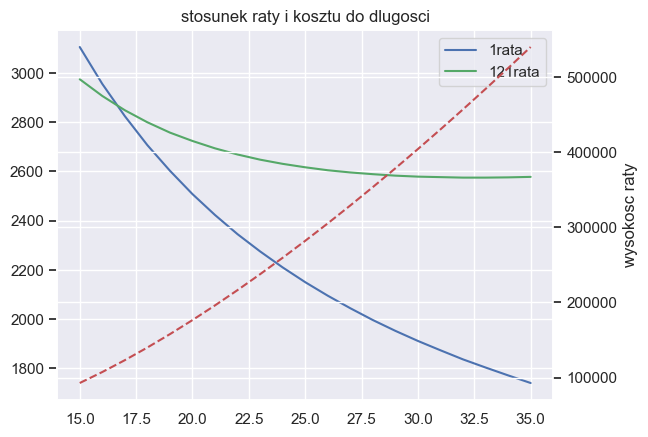

In [20]:
rata1=[x[0] for x in raty]
rata121=[x[120] for x in raty]

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# ax1.scatter(dlugosci,doplaty)
#dziwne ze doplaty rosna - OK bo splacamy mniej kapitalu
ax2.plot(dlugosci,odsetki, color='r', linestyle='dashed',)


ax1.plot(dlugosci,rata1, color='b', label='1rata')
ax1.plot(dlugosci,rata121, color='g', label='121rata')

ax1.legend(loc='best')
# plt.ylim([-1, 20])
plt.grid(True)
plt.xlabel('ilos lat kredytu')
plt.ylabel('wysokosc raty')
plt.title('stosunek raty i kosztu do dlugosci')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


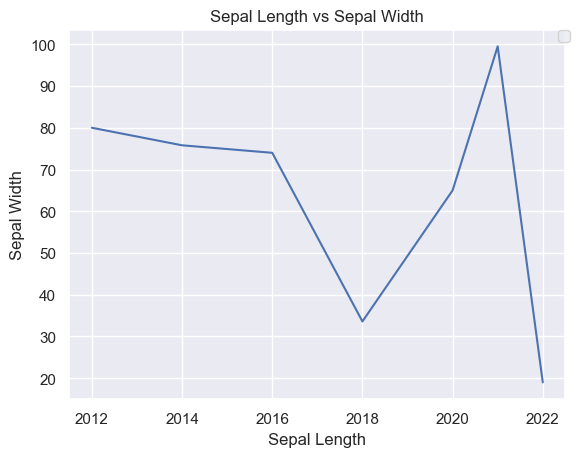

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Year = [2012, 2014, 2016, 2020, 2021, 2022, 2018]
Profit = [80, 75.8, 74, 65, 99.5, 19, 33.6]

data_plot = pd.DataFrame({"Year":Year, "Profit":Profit})

sns.set(style='darkgrid',)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
sns.lineplot(x = "Year", y = "Profit", data=data_plot)
plt.show()

In [13]:
# First import plotly express as px
import plotly.express as px
# Create a lineplot on a DataFramed named stock_data

# In this example, we’re updating a scatter plot named fig_ln
# Create a plot with plotly (can be of any type)
fig = px.line(data_plot,x = "Year", y = "Profit")

# fig.update_traces(patch={"line": {"dash": "dot",
#                            "shape": "spline",
#                            "width": 6}})
fig.show()


In [21]:
x = dlugosci
y = rata121
fig = px.line(x=x, y=y)
fig.show()

In [30]:

from plotly.subplots import make_subplots
subfig = make_subplots(specs=[[{"secondary_y": True}]])
y = list(map(lambda x: round(x/50)*50,rata121))
# create two independent figures with px.line each containing data from multiple columns
fig = px.line(x=x, y=y)
fig2 = px.line(x=x, y=odsetki)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="X"
subfig.layout.yaxis.title="Y1"
subfig.layout.yaxis2.title="Y2"

# recoloring is necessary otherwise lines from fig und fig2 would share each color
subfig.for_each_trace(lambda t: t.update(line={'color':t.marker.color}))
subfig.show()
y

[3000,
 2900,
 2850,
 2800,
 2750,
 2700,
 2700,
 2650,
 2650,
 2650,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600]